In [245]:
import snap
import networkx as nx
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
g_nx = nx.read_edgelist('data/Wiki-Vote.txt', create_using=nx.DiGraph())
g_sn = snap.LoadEdgeList(snap.PNGraph, 'data/Wiki-Vote.txt')

# Analyzing the Wikipedia voters network
### 1) The number of edges and nodes in the network

In [45]:
print('networkx')
print(f'# edges: {g_nx.number_of_edges()}')
print(f'# nodes: {g_nx.number_of_nodes()}')

print('snap')
print(f'# edges: {g_sn.GetEdges()}')
print(f'# nodes: {g_sn.GetNodes()}')

networkx
# edges: 103689
# nodes: 7115
snap
# edges: 103689
# nodes: 7115


### 2) The number of nodes with a self-edge (self-loop)

In [66]:
print('networkx')
print(f'# self-loops: {g_nx.number_of_selfloops()}')

print('snap')
print(f'# self-loops: {snap.CntSelfEdges(g_sn)}')

networkx
# self-loops: 0
snap
# nodes: 0


### 3) The number of directed edges in the network

In [115]:
print('snap')
print(f'# self-loops: {snap.CntUniqDirEdges(g_sn)}')

snap
# self-loops: 103689


### 4) The number of undirected edges in the network

In [114]:
print('snap')
print(f'# self-loops: {snap.CntUniqUndirEdges(g_sn)}')

snap
# self-loops: 100762


### 5) The number of reciprocated edges in the network

In [ ]:
2927

In [214]:
Nodes = snap.TIntV()
for nodeId in range(10):
    Nodes.Add(nodeId)

In [215]:
snap.GetEdgesInOut(g_test_s, Nodes)

RuntimeError: Execution stopped: (0<=ValN)&&(ValN<Vals) [Reason:'Index:-1 Vals:3 MxVals:16 Type:TVec<class THashKeyDat<class TInt,class TNGraph::TNode>,int>'], file S:\glib-core\ds.h, line 487

### 6) The number of nodes of zero out-degree

In [216]:
print('snap')
print(f'# nodes of zero out-degree: {snap.CntOutDegNodes(g_sn, 0)}')

snap
# nodes of zero out-degree: 1005


### 7) The number of nodes of zero in-degree

In [217]:
print('snap')
print(f'# nodes of zero in-degree: {snap.CntInDegNodes(g_sn, 0)}')

snap
# nodes of zero in-degree: 4734


### 8) The number of nodes with more than 10 outgoing edges

In [242]:
print('snap')
print(f'# nodes with more than 10 outgoing edges: {g_sn.GetNodes() - sum([snap.CntOutDegNodes(g_sn, i) for i in range(11)])}')

snap
# nodes with more than 10 outgoing edges: 1612


### 9) The number of nodes with fewer than 10 incoming edges

In [243]:
print('snap')
print(f'# nodes with fewer than 10 incoming edges: {sum([snap.CntInDegNodes(g_sn, i) for i in range(10)])}')

snap
# nodes with fewer than 10 incoming edges: 5165


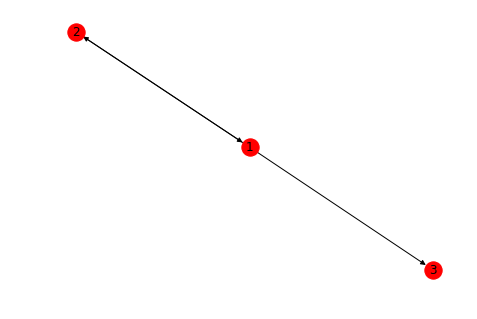

In [65]:
g_test = nx.DiGraph()
g_test.add_node(1)
g_test.add_node(2)
g_test.add_node(3)
g_test.add_edge(1, 2)
g_test.add_edge(2, 1)
g_test.add_edge(1, 3)
g_test.add_edge(1, 1)

nx.draw(g_test, with_labels=True)

In [102]:
g_test_s = snap.TNGraph.New()

In [103]:
g_test_s.AddNode(1)
g_test_s.AddNode(2)
g_test_s.AddNode(3)
g_test_s.AddEdge(1, 2)
g_test_s.AddEdge(2, 1)
g_test_s.AddEdge(1, 3)
g_test_s.AddEdge(1, 1)


NIdName = snap.TIntStrH()
NIdName[1] = "1"
NIdName[2] = "2"
NIdName[3] = "3"

In [104]:
snap.DrawGViz(g_test_s, snap.gvlDot, "G1.png", "G1", NIdName)

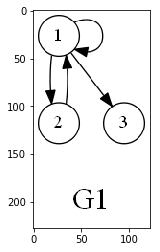

In [108]:
img = plt.imread('G1.png')
plt.imshow(img)

# Further Analyzing the Wikipedia voters network

In [258]:
df = nx.to_numpy_matrix(g_nx)

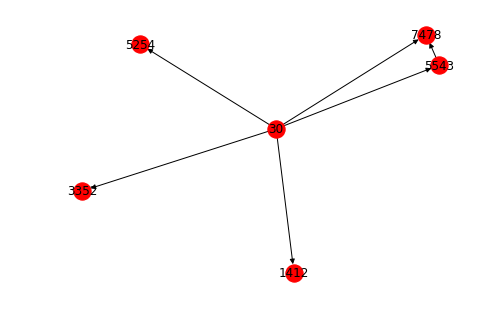

In [270]:
nx.draw(g_nx.subgraph(['30', '1412', '3352', '5254', '5543', '7478']), with_labels=True)

In [268]:
g_nx['30']

AtlasView({'1412': {}, '3352': {}, '5254': {}, '5543': {}, '7478': {}})

Plot the distribution of out-degrees of nodes in the network on a log-log scale.
Each data point is a pair (x; y) where x is a positive integer and y is the number of nodes
in the network with out-degree equal to x. Restrict the range of x between the minimum
and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log
scale, use base 10 for both x and y axes.

In [333]:
df = pd.DataFrame(list(g_nx.out_degree()), columns=['Outdegree', 'Count'])

df['Outdegree'] = df['Outdegree'].astype(int)

df = df.query('Count != 0')

In [335]:
df.head()

,Outdegree,Count
0,30,5
2,3352,273
3,5254,33
4,5543,137
6,3,23


In [350]:
df = df.sort_values('Count', ascending=False)

In [351]:
df['Index'] = range(1, len(df) + 1)

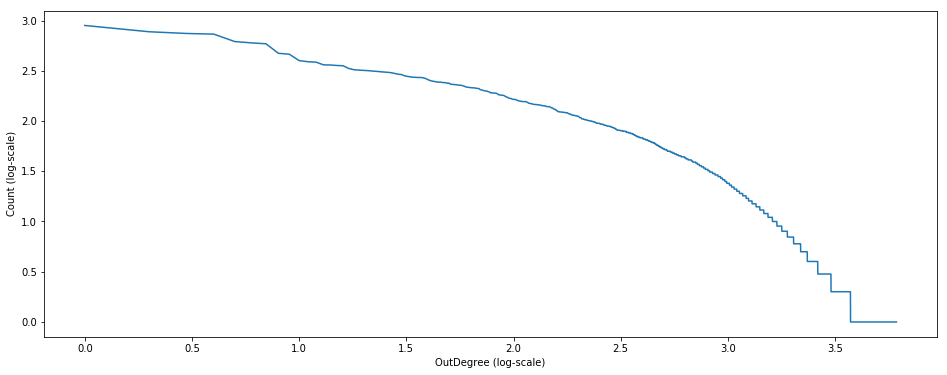

In [366]:
plt.figure(figsize=(16, 6))
plt.xlabel("OutDegree (log-scale)")
plt.ylabel("Count (log-scale)")
plt.plot(np.log10(df['Index']), np.log10(df['Count']))
plt.show()

[-1.47401391  5.5475723 ]


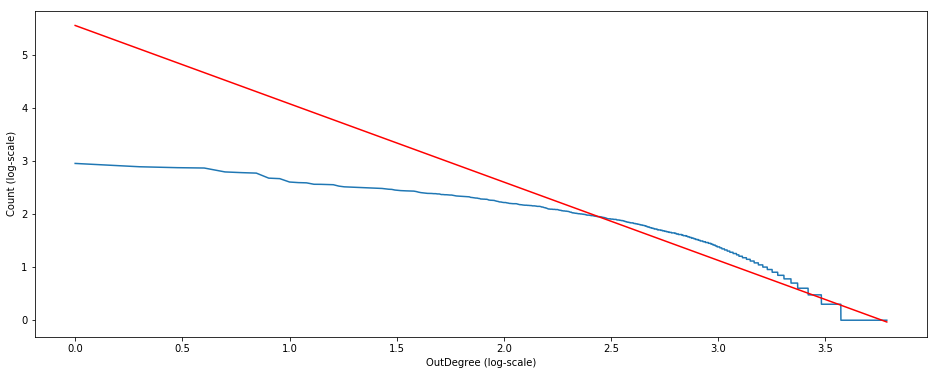

In [367]:
fit = np.polyfit(np.log10(df['Index']), np.log10(df['Count']), deg = 1)
fitted = fit[1] + fit[0]*np.log10(df['Index'])
plt.figure(figsize=(16, 6))
plt.xlabel("OutDegree (log-scale)")
plt.ylabel("Count (log-scale)")
plt.plot(np.log10(df['Index']), np.log10(df['Count']))
plt.plot(np.log10(df['Index']), fitted, 'r-')
print(fit)

# Finding Experts on the Java Programming Language on StackOverflow

In [368]:
g_sto_nx = nx.read_edgelist('data/stackoverflow-Java.txt', create_using=nx.DiGraph())
g_sto_sn = snap.LoadEdgeList(snap.PNGraph, 'data/stackoverflow-Java.txt')

### 1) The number of weakly connected components in the network

In [391]:
print('networkx')
print(f'# of weakly connected components: {len([len(c) for c in sorted(nx.weakly_connected_components(g_sto_nx))])}')


Components = snap.TCnComV()
snap.GetWccs(g_sto_sn, Components)
print('snap')
print(f'# of weakly connected components: {len([CnCom.Len() for CnCom in Components])}')

networkx
# of weakly connected components: 10143
snap
# of weakly connected components: 10143


### 2) The number of edges and the number of nodes in the largest weakly connected component

In [391]:
print('networkx')
print(f'# of weakly connected components: {len([len(c) for c in sorted(nx.weakly_connected_components(g_sto_nx))])}')


Components = snap.TCnComV()
snap.GetWccs(g_sto_sn, Components)
print('snap')
print(f'# of weakly connected components: {len([CnCom.Len() for CnCom in Components])}')

networkx
# of weakly connected components: 10143
snap
# of weakly connected components: 10143
